<a href="https://colab.research.google.com/github/Michael5577/Image-Classification-Project/blob/main/Image_Classifier_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Processing: https://upload.wikimedia.org/wikipedia/commons/4/41/Sunflower_from_Silesia2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


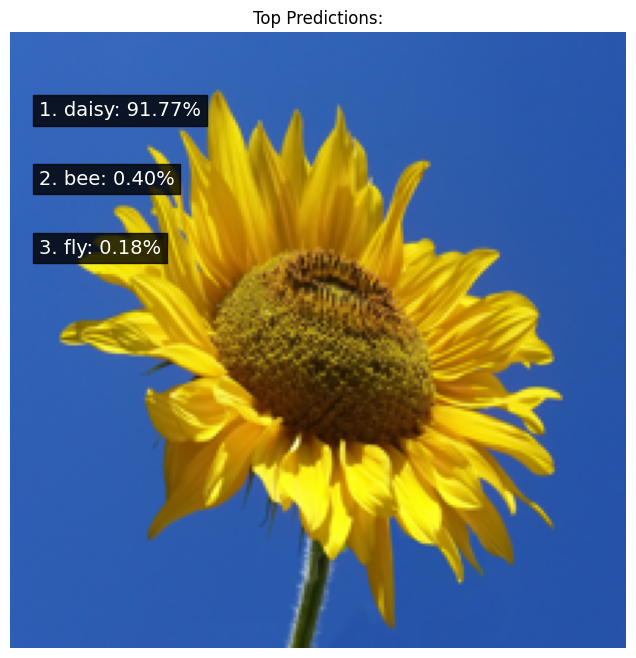


Processing: https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


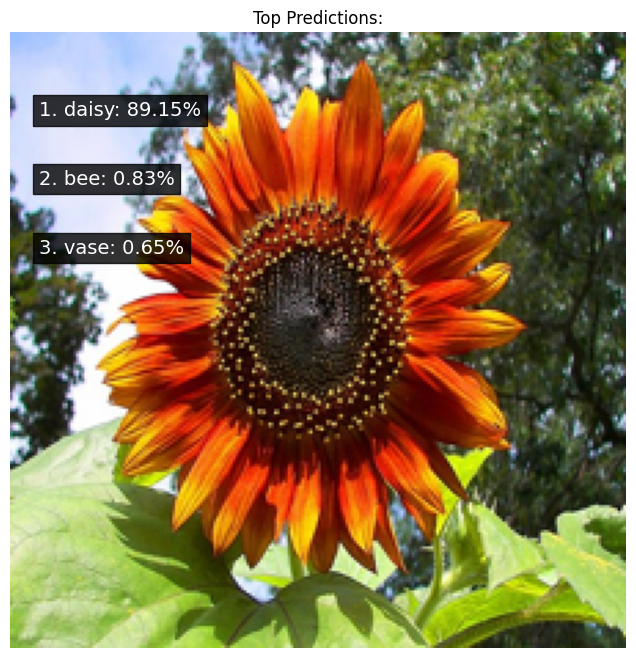


Processing: https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


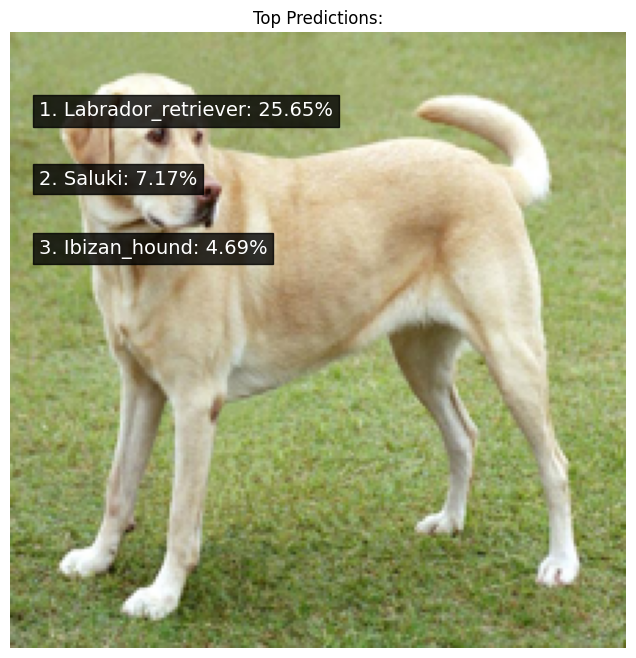

In [3]:
!pip install pillow-avif-plugin

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Proper Wikimedia-compliant User-Agent [2]
headers = {
    'User-Agent': 'ImageClassificationBot/1.0 (https://colab.research.google.com/; your-email@domain.com)'
}

def safe_image_fetch(url):
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()

        # Verify image content
        if not response.headers.get('Content-Type', '').startswith('image/'):
            raise ValueError("URL does not point to an image")

        return Image.open(BytesIO(response.content))

    except Exception as e:
        print(f"Error fetching {url}: {type(e).__name__} - {str(e)}")
        return None

# Verified working test images [11]
test_images = [
    "https://upload.wikimedia.org/wikipedia/commons/4/41/Sunflower_from_Silesia2.jpg",  # Original Wikimedia source
    "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"
]

model = MobileNetV2(weights='imagenet')  # Load model once

for url in test_images:
    print(f"\nProcessing: {url}")
    img = safe_image_fetch(url)

    if img:
        try:
            # Convert to RGB and resize
            img = img.convert('RGB').resize((224, 224))
            img_array = preprocess_input(np.expand_dims(np.array(img), axis=0))

            # Make prediction
            predictions = model.predict(img_array)
            decoded = decode_predictions(predictions, top=3)[0]

            # Display results
            plt.figure(figsize=(8, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.title("Top Predictions:")
            for i, (_, label, score) in enumerate(decoded):
                plt.text(10, 30 + i*25, f"{i+1}. {label}: {score:.2%}",
                        fontsize=14, color='white',
                        bbox=dict(facecolor='black', alpha=0.8))
            plt.show()

        except Exception as e:
            print(f"Processing error: {str(e)}")
